# WINDOW FUNCTION: TESS vs LIGHT CURVE
## LIGHT CURVE 

## TESS

#### Note on path and package import
Before importing user-defined package (`AROMA` in this case), you might want to `pip install <path/to/AROMA>` where `<path/to/AROMA>` is the folder containing `setup.py`.

In [1]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
%matplotlib inline

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir
plotPath=homedir+'/plots/'
plotPath

import numpy.random as random
from astropy import units as u
import matplotlib.patches as patches
def: find_nearest(array, value)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)
data_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data
data_path :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt
plot_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots
def: find_nearest(array, value)


'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots/'

In [4]:
data = pd.read_csv(data_path, header=0, delimiter='\t')
time=(data.TIME -data.TIME.iloc[0])*24
lc  =data.PSF_FLUX_NORM
elc =data.PSF_EFLUX

In [4]:
time

0          0.000000
1          0.166670
2          0.333341
3          0.500011
4          0.666681
           ...     
5522    1196.166298
5523    1196.332961
5524    1196.499624
5525    1196.666286
5526    1196.832949
Name: TIME, Length: 5527, dtype: float64

In [5]:
# Calculate the window Function
wtime = np.linspace(0.,1200,10000)
window = np.zeros(10000)

# Replace data with test sine wave
mu, sigma = 1.0, 0.013 # mean and standard deviation
noise = random.normal(mu, sigma, len(time))
period1 = 5.26
period2 = 6.9
period2 = 4.69
sinelc = 1.0+0.05*np.sin(2*np.pi*(time/period1))+noise
#sinelc = sinelc+0.03*np.sin(2*np.pi*(time/period2))
# plt.plot(sinelc)

In [6]:
for ii in time:
   #print('Time value:',ii)
   ndx = find_nearest(wtime,ii)
   #print(ndx)
   window[ndx]=1.0

#elc=np.ones(10000)/1000.
#period = 15.
#lc = 0.5*np.sin(2*np.pi*(time/period))

frequen = np.linspace(0.003,10.,100000)

# Compute the GLS periodogram with default options.
# Choose Zechmeister-Kuerster normalization explicitly
clp = pyPeriod.Gls((time,lc,elc), norm="ZK", freq=frequen,ofac=10)

# Calculate the Periodogram for the Window Function
wlp = pyPeriod.Gls((wtime,window), norm="ZK", freq=frequen,ofac=10)
clp.info

sinelp=pyPeriod.Gls((time,sinelc), norm="ZK", freq=frequen,ofac=10)


(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7ff268acc910>])

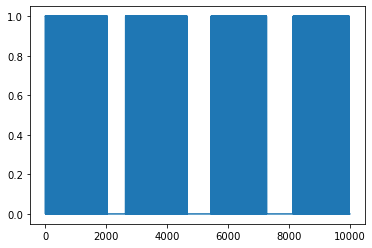

In [7]:
plt.figure(), plt.plot(window)

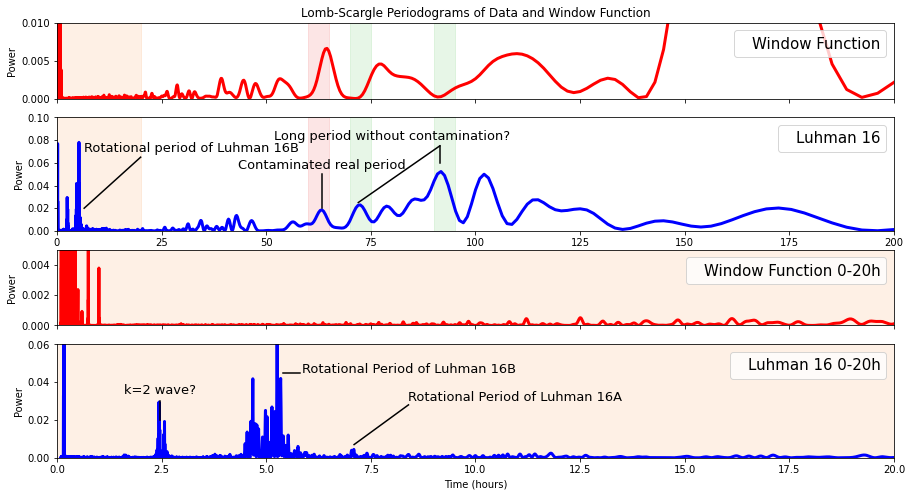

In [16]:
plt.close()
fig, (a0, a1, a2, a3) = plt.subplots(4, 1, figsize=(15,8), gridspec_kw={'height_ratios': [1, 1.5, 1, 1.5]})
# matplotlib.rcParams.update({'font.size': 12})
save = True
# save = False

fr = clp.freq
pw = clp.power
hpp = 1./fr

wfr = wlp.freq
wpw = wlp.power
whpp = 1./wfr
 
sinefr = sinelp.freq
sinepw = sinelp.power
sinehpp=1./sinefr

txtsize = 13
headersize = 15
lw_data=3.0
lw_other=1.5

backgroundcolor = 'xkcd:orange'
backgroundalpha = 0.1

goodcolor = 'xkcd:green'
badcolor = 'xkcd:red'

limxlarge = [0,200]
#======================================= [1/4]
## Plot the "Window Function 0-140h"
a0.plot(whpp, wpw, '-', linewidth=lw_data,color='red', label='Window Function')
a0.set_title('Lomb-Scargle Periodograms of Data and Window Function')

rect = plt.Rectangle((0,0), 20, 0.1, color=backgroundcolor, alpha=backgroundalpha)
rectA = plt.Rectangle((60,0), 5, 0.1, color=badcolor, alpha=backgroundalpha)
rectB = plt.Rectangle((70,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
rectC = plt.Rectangle((90,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
a0.add_patch(rect)
a0.add_patch(rectA), a0.add_patch(rectB), a0.add_patch(rectC)

a0.set_ylim([0.00,0.01])
a0.set_xlim(limxlarge)
# a0.text(70.0,0.008,'Window Function 0-140h',horizontalalignment='center',fontsize=headersize)
a0.set_ylabel('Power')
a0.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')
a0.set_xticklabels([])
#======================================= [2/4]
## Plot the data: Luhman 16 0-140h
a1.plot(hpp, pw, '-', linewidth=lw_data,color="blue", label='Luhman 16')
a1.set_ylabel('Power')
# a1.set_xlabel('Time (hours)')

xx=91.5
yy=0.06
a1.plot([xx,xx],[yy,0.075],color='black',linewidth=lw_other)
a1.plot([72,xx],[0.025,0.075],color='black',linewidth=lw_other)
a1.text(80,0.08,'Long period without contamination?',horizontalalignment='center',fontsize=txtsize)

xx=63.25
yy=0.02
a1.plot([xx,xx],[yy,0.050],color='black',linewidth=lw_other)
a1.text(xx,0.055,'Contaminated real period',horizontalalignment='center',fontsize=txtsize)

xx=6.5
yy=0.02
a1.plot([xx,20],[yy,0.065],color='black',linewidth=lw_other)
a1.text(xx,0.07,'Rotational period of Luhman 16B',horizontalalignment='left',fontsize=txtsize)

rect = plt.Rectangle((0,0), 20, 0.1, color=backgroundcolor, alpha=backgroundalpha)
rectA = plt.Rectangle((60,0), 5, 0.1, color=badcolor, alpha=backgroundalpha)
rectB = plt.Rectangle((70,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
rectC = plt.Rectangle((90,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
a1.add_patch(rect)
a1.add_patch(rectA), a1.add_patch(rectB), a1.add_patch(rectC)

a1.set_xlim(limxlarge)
a1.set_ylim([0.,0.1])
a1.legend(prop={'size': headersize}, handlelength=0.0)
# a1.set_xlabel('Time (hours)')
#======================================= [3/4]
## Plot the: Window Function 0-20h
a2.plot(whpp, wpw, '-', linewidth=lw_data,color='red', label='Window Function 0-20h')

a2.set_ylabel('Power')
a2.set_xlim([0,20])
a2.set_ylim([0.,0.005])
# Change background color
a2.patch.set_facecolor(backgroundcolor)
a2.patch.set_alpha(backgroundalpha)
a2.legend(prop={'size': headersize}, handlelength=0.0)
a2.set_xticklabels([])
#======================================= [4/4]
## Plot the data: Luhman 16 0-20h
a3.plot(hpp, pw, '-', linewidth=lw_data,color='blue', label='Luhman 16 0-20h')
a3.set_ylabel('Power')

xx=121.
yy=0.15
plt.plot([xx,xx],[yy,0.23],color='black',linewidth=lw_other)
# plt.text(xx,0.25,'Window function artifact',horizontalalignment='center',fontsize=11)

xx=7.1
yy=0.017
a3.plot([xx,xx+1.3],[yy-0.01,0.028],color='black',linewidth=lw_other)
a3.text(xx+1.3,0.030,"Rotational Period of Luhman 16A",horizontalalignment='left',fontsize=txtsize)

a3.plot([5.4,5.8],[0.045,0.045],color='black',linewidth=lw_other)
a3.text(5.85,0.045,'Rotational Period of Luhman 16B',horizontalalignment='left',fontsize=txtsize)

xx=2.46
yy=0.020
a3.plot([xx,xx],[yy,0.03],color='black',linewidth=lw_other)
a3.text(xx,0.034,'k=2 wave?',horizontalalignment='center',fontsize=txtsize)

a3.set_xlim([0,20])
a3.set_ylim([0,0.06])
a3.set_xlabel('Time (hours)')
# Change background color
a3.patch.set_facecolor(backgroundcolor)
a3.patch.set_alpha(backgroundalpha)
a3.legend(prop={'size': headersize}, handlelength=0.0)
if save:
    plt.savefig(plotPath+'[5x1]periodogram_windowFunction_Data.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(plotPath+'[5x1]periodogram_windowFunction_Data.pdf', dpi=300, bbox_inches = 'tight')

plt.show()

### Processing and plotting the periodograms of the window function, X,Y positions, and median pixel distance difference of Luhman 16AB

In [9]:
# x,y position and source distance to median
xpos = data.X_POSITION
ypos = data.Y_POSITION
dist = np.sqrt((xpos-np.median(xpos))**2 + (ypos-np.median(ypos))**2)
# error
xpos_err = np.repeat(np.std(xpos),len(xpos))
ypos_err = np.repeat(np.std(ypos),len(ypos))

## Calculate periodogram for X,Y position and source pixel-distance variation
# Compute the GLS periodogram with default options.
# Choose Zechmeister-Kuerster normalization explicitly
#clp = pyPeriod.Gls((time,lc,xpos_err), norm="ZK", freq=frequen,ofac=10)
xlp = pyPeriod.Gls((time,xpos,xpos_err), norm="ZK", freq=frequen,ofac=10)
ylp = pyPeriod.Gls((time,ypos,ypos_err), norm="ZK", freq=frequen,ofac=10)
distlp = pyPeriod.Gls((time,dist,np.sqrt(2)*ypos_err), norm="ZK", freq=frequen,ofac=10)

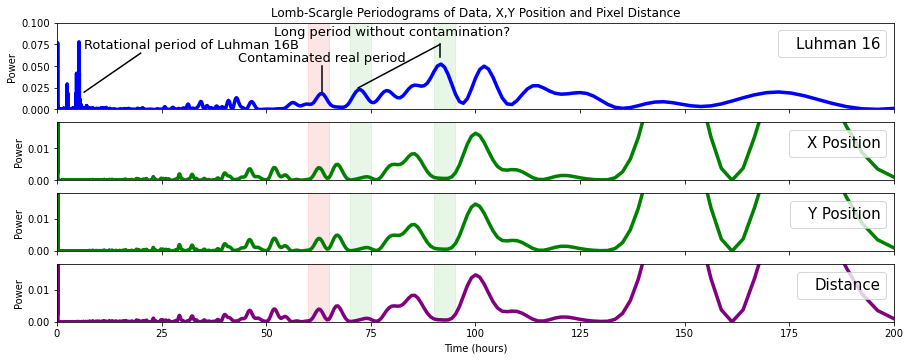

In [15]:
plt.close()
fig, (a1, a2, a3, a4) = plt.subplots(4, 1, figsize=(15,5.5), gridspec_kw={'height_ratios': [1.5, 1, 1, 1]})
# save = True
save = False

xfr = xlp.freq
xpw = xlp.power
xhpp = 1./xfr

yfr = ylp.freq
ypw = ylp.power
yhpp = 1./yfr

distfr = distlp.freq
distpw = distlp.power
disthpp = 1./distfr

txtsize = 13
headersize = 15
lw_data = 3.5
lw_other=1.5

backgroundcolor = 'xkcd:orange'
backgroundalpha = 0.1

goodcolor = 'xkcd:green'
badcolor = 'xkcd:red'

limx = [0,200]
#======================================= [1]
## Plot the data: Luhman 16
a1.set_title('Lomb-Scargle Periodograms of Data, X,Y Position and Pixel Distance')
a1.plot(hpp, pw, '-', linewidth=lw_data,color="blue", label='Luhman 16')
a1.set_ylabel('Power')

xx=91.5
yy=0.06
a1.plot([xx,xx],[yy,0.075],color='black',linewidth=lw_other)
a1.plot([72,xx],[0.025,0.075],color='black',linewidth=lw_other)
a1.text(80,0.085,'Long period without contamination?',horizontalalignment='center',fontsize=txtsize)

xx=63.25
yy=0.02
a1.plot([xx,xx],[yy,0.05],color='black',linewidth=lw_other)
a1.text(xx,0.055,'Contaminated real period',horizontalalignment='center',fontsize=txtsize)

xx=6.5
yy=0.02
a1.plot([xx,20],[yy,0.065],color='black',linewidth=lw_other)
a1.text(xx,0.07,'Rotational period of Luhman 16B',horizontalalignment='left',fontsize=txtsize)
a1.set_xlim(limx)
a1.set_ylim([0.,0.1])
a1.legend(prop={'size': headersize}, handlelength=0.0)

# rect = plt.Rectangle((0,0), 20, 0.1, color=backgroundcolor, alpha=backgroundalpha)
rectA = plt.Rectangle((60,0), 5, 0.1, color=badcolor, alpha=backgroundalpha)
rectB = plt.Rectangle((70,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
rectC = plt.Rectangle((90,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
# a1.add_patch(rect)
a1.add_patch(rectA), a1.add_patch(rectB), a1.add_patch(rectC)
a1.set_xticklabels([])
#======================================= [2]
## Plot the: X position
a2.plot(xhpp, xpw, '-', linewidth=lw_data,color="green", label='X Position')
a2.set_ylabel('Power')
a2.set_xlim(limx)
a2.set_ylim([0.,0.018])
a2.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')

# rect = plt.Rectangle((0,0), 20, 0.1, color=backgroundcolor, alpha=backgroundalpha)
rectA = plt.Rectangle((60,0), 5, 0.1, color=badcolor, alpha=backgroundalpha)
rectB = plt.Rectangle((70,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
rectC = plt.Rectangle((90,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
# a2.add_patch(rect)
a2.add_patch(rectA), a2.add_patch(rectB), a2.add_patch(rectC)
a2.set_xticklabels([])
#======================================= [3]
## Plot the: Y position 
a3.plot(yhpp, ypw, '-', linewidth=lw_data,color="green", label='Y Position')
a3.set_ylabel('Power')
a3.set_xlim(limx)
a3.set_ylim([0.,0.018])
a3.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')

# rect = plt.Rectangle((0,0), 20, 0.1, color=backgroundcolor, alpha=backgroundalpha)
rectA = plt.Rectangle((60,0), 5, 0.1, color=badcolor, alpha=backgroundalpha)
rectB = plt.Rectangle((70,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
rectC = plt.Rectangle((90,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
# a3.add_patch(rect)
a3.add_patch(rectA), a3.add_patch(rectB), a3.add_patch(rectC)
a3.set_xticklabels([])
#======================================= [4]
## Plot the: Luhman 16 distance
a4.plot(disthpp, distpw, '-', linewidth=lw_data,color="purple", label='Distance')
a4.set_ylabel('Power')
a4.set_xlim(limx)
a4.set_ylim([0.,0.018])
a4.set_xlabel('Time (hours)')
a4.legend(prop={'size': headersize}, handlelength=0.0, loc='upper right')

# rect = plt.Rectangle((0,0), 20, 0.1, color=backgroundcolor, alpha=backgroundalpha)
rectA = plt.Rectangle((60,0), 5, 0.1, color=badcolor, alpha=backgroundalpha)
rectB = plt.Rectangle((70,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
rectC = plt.Rectangle((90,0), 5, 0.1, color=goodcolor, alpha=backgroundalpha)
# a4.add_patch(rect)
a4.add_patch(rectA), a4.add_patch(rectB), a4.add_patch(rectC)

if save:
    plt.savefig(plotPath+'[5x1]XYposDistance_periodogram.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(plotPath+'[5x1]XYposDistance_periodogram.pdf', dpi=300, bbox_inches = 'tight')

plt.show()